<a href="https://colab.research.google.com/github/crodier1/data_science/blob/main/date_a_scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv("profiles.csv")

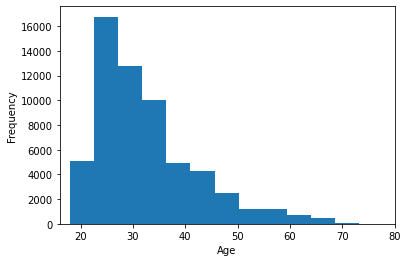

In [ ]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [ ]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

df['all_essays'] = df[essay_cols].apply(lambda x: ' '.join(x), axis=1)

TypeError: ignored

In [ ]:
df["essay_len"] = df['all_essays'].apply(lambda x: len(x))


In [ ]:
import re

def getCount(essay):
  essayLowerCase = re.sub(r'[^\w\s]','',essay).lower().split()  
  return essayLowerCase.count('i') + essayLowerCase.count('me')

df['avg_word_length'] = df['all_essays'].apply(lambda e : getCount(e))

KeyError: ignored

In [ ]:
categories = ['drinks', 'drugs', 'education','ethnicity', 'job','location', 'offspring', 'sex', 'smokes']

all_data = pd.DataFrame()

def getDummies(category):
  dummies = pd.get_dummies(df[category])
  columns = list(dummies.columns)[:-1]
  all_data[columns] = dummies.drop(dummies.columns[-1], axis=1)

for c in categories:
  getDummies(c)

all_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,desperately,not at all,often,rarely,socially,never,college/university,dropped out of college/university,dropped out of high school,dropped out of law school,...,has kids,"has kids, and might want more","has kids, and wants more","has kids, but doesn&rsquo;t want more",might want kids,f,no,sometimes,trying to quit,when drinking
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
59942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59943,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59944,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

x = df[['age']].values

x_scaled = min_max_scaler.fit_transform(x)

all_data['age'] = pd.DataFrame(x_scaled, columns= ['age'])

all_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


,desperately,not at all,often,rarely,socially,never,college/university,dropped out of college/university,dropped out of high school,dropped out of law school,...,"has kids, and might want more","has kids, and wants more","has kids, but doesn&rsquo;t want more",might want kids,f,no,sometimes,trying to quit,when drinking,age
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.043478
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.184783
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.217391
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.054348
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.119565


In [ ]:
all_data['income'] = df.income

all_data['income'].dropna(inplace=True)

all_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


,desperately,not at all,often,rarely,socially,never,college/university,dropped out of college/university,dropped out of high school,dropped out of law school,...,"has kids, and wants more","has kids, but doesn&rsquo;t want more",might want kids,f,no,sometimes,trying to quit,when drinking,age,income
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.043478,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.184783,80000
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.217391,-1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.054348,20000
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0.119565,-1


In [ ]:
x = all_data[all_data.columns[:-1]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, all_data.income, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train, y_train)

model.score(X_test, y_test)

-4.140254870773952e+19

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

scores = []

for n in range(1, 31):

  regressor = KNeighborsRegressor(n_neighbors = n)

  regressor.fit(X_train, y_train)

  scores.append(regressor.score(X_test, y_test)) 

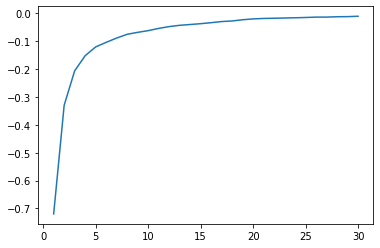

In [ ]:
plt.plot([i for i in range(1,31)], scores)
plt.show()

In [ ]:
from sklearn.svm import SVC

classifier = SVC()

classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.8096850831522013

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.7977556487893646